## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

# 1. Analysis: Frame the Problem and Look at the Big Picture

### 1. Description


---

The task is to build a machine learning model that classifies specific fruits and vegetables from images. This problem is particularly engaging for us as it directly aligns with the themes of our bachelor project, which focuses on food, nutrition, and wellbeing. By incorporating image recognition into our app, we aim to enhance users' culinary experiences while promoting healthier, more informed food choices.

---

### 2. Business Objective Definition.


---

The objective is to develop an image classification model that can classify fruits and vegetables. This can be used in applications like grocery shopping apps, dietary trackers, or food recognition tools, or mainly into our bachelor project focusing on.

---

### 3. Framing the problem.

---
This is a **supervised learning** problem, where the model is going to be fed with a picture of a vegetables or a fruit, identify it and map it into its corresponding category. The model is going to be trained with a dataset that contains images and categorical labels. 

A classification model is going to be used to classify an image to a category, albeit at the present time it has not been decided which one yet. 

---


### 4. Measuring Performance

---
The performance is going to be measured using combination of several performance metrics. **Accuracy**, **F1-Score**, **Precision**, and **Recall**.

- **Accuracy**: Measures the overall percentage of correct predictions out of all predictions. We are going to use it to gain a general sense of how well the model performs across all classes.

- **Precision**: Measures the percentage of true positive predictions out of all positive predictions made by the model. It will help us recognize when the cost of false positives is high, such as incorrectly labeling a banana as an apple.
- **Recall**: Measures the percentage of true positive predictions out of all actual positives. It will helps us recognize when the cost of false negatives is high, like missing a fruit or vegetable that should be recognized.
- **F1 - Score**: Combines both **precision** and **recall** into a single metric, offering a balance between the two. It's particularly important when the dataset has imbalanced classes, it is going to help us evaluate both false positives and false negatives.



Each of these metrics provides a different perspective on model performance, allowing for a comprehensive evaluation, especially in cases where class imbalance or specific prediction errors are a concern.

---



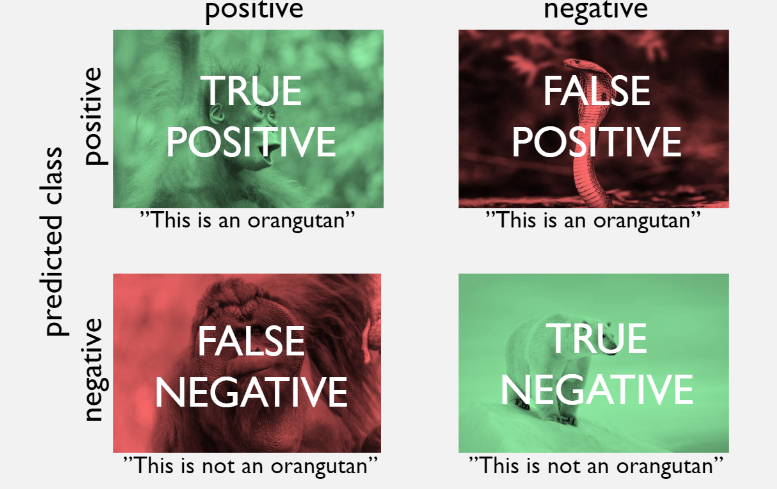


# 2. Get the data

### Finding the data.

---
The data can be found in Kaggle.
<a href="Food-Ingredient-Dataset-51
">51 Food and Vegetable Dataset</a>.

---


# 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

## Loading the data.

In [ ]:
import os
from PIL import Image
import numpy as np

# Path to the directory containing the images
data_dir = 'Food_Ingredients'

# Function to load images
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path).convert('RGB')  # Ensure all images are in RGB format
                img = img.resize((128, 128))  # Resize images to a fixed size
                img_array = np.array(img)
                images.append(img_array)
                labels.append(os.path.basename(subdir))
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_from_folder(data_dir)

print(f'Loaded {len(images)} images from {data_dir}')
# Output the directory and the number of files in each directory
for subdir, dirs, files in os.walk(data_dir):
    print(f'Directory: {subdir}, Number of files: {len(files)}')

c:\Users\rkiry\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 4501 images from Food_Ingredients


# 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

# 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

# 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

# 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.